# California Housing Exploratory Data Analysis

This notebook presents an exploratory data analysis (EDA) of the California Housing dataset using Pandas, NumPy, Matplotlib, and Seaborn. The analysis focuses on understanding the dataset's characteristics, identifying relationships between features, and uncovering insights for predicting housing values.

Key steps and findings include:

- **Data Loading and Initial Exploration:** The California Housing dataset is loaded, and its structure, data types, and missing values are examined. Basic descriptive statistics are calculated to understand the central tendency and spread of each feature.
- **Univariate Analysis:** Individual features are analyzed to understand their distributions, identify potential outliers, and visualize their characteristics using histograms and box plots.
- **Bivariate Analysis:** Relationships between pairs of features are explored to identify potential correlations and dependencies that might be useful for predictive modeling. Scatter plots and KDE plots are used for visualization.
- **Feature Engineering:** New features are created or existing ones are transformed to potentially improve the performance of a predictive model. This includes creating categorical features and per-person metrics.
- **Correlation Analysis:** The linear relationships between all numerical features are quantified and visualized using a correlation matrix and heatmap, highlighting the strongest predictors of median house value.

This EDA provides a comprehensive understanding of the dataset and identifies key features for predictive modeling.

## 1. Data Loading and Initial Exploration


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# get the first 10 rows
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [ ]:
# get the last 10 rows
df.tail(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20630,3.5673,11.0,5.932584,1.134831,1257.0,2.824719,39.29,-121.32,1.120
20631,3.5179,15.0,6.145833,1.141204,1200.0,2.777778,39.33,-121.40,1.072
20632,3.1250,15.0,6.023377,1.080519,1047.0,2.719481,39.26,-121.45,1.156
20633,2.5495,27.0,5.445026,1.078534,1082.0,2.832461,39.19,-121.53,0.983
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
# get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# check for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
# calculate and display descriptive statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


While the initial look at the data shows it's realistic and has no missing values, the `describe()` output points out potential outliers in MedInc, AveRooms, AveBedrms, Population, and AveOccup due to their significantly high maximum values.


## 2. Exploring Individual Features (Univariate Analysis):

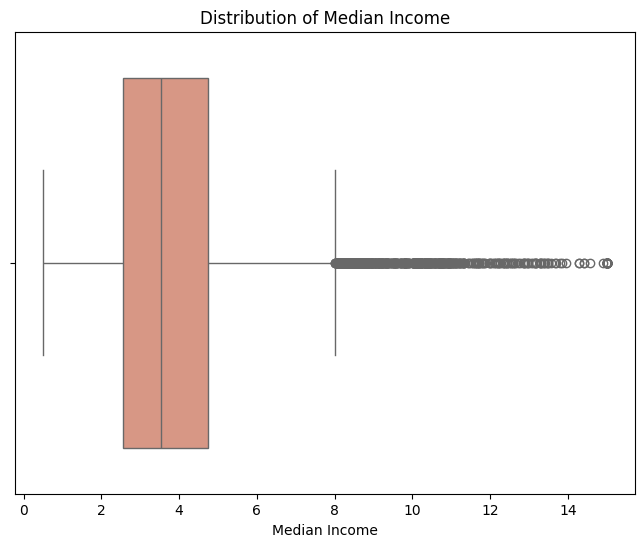

In [ ]:
# distribution of Median Income
col = 'MedInc'
plt.figure(figsize=(8, 6))
mi = sns.boxplot(x=df[col], color='#E59077')
plt.title('Distribution of Median Income')
mi.set_xlabel('Median Income')
plt.show()

The box plot for Median Income shows that the majority of block groups have lower to middle median incomes, with the median value falling between 3 and 4. The presence of many individual points extending far above the upper whisker indicates a significant number of outliers with much higher median incomes compared to the bulk of the data.

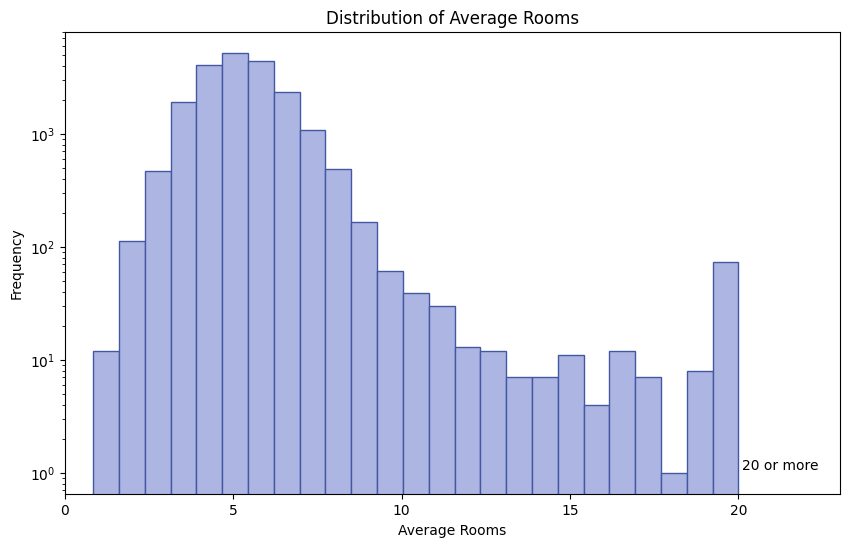

In [ ]:
# distribution of Average Rooms
clipped_data = np.clip(df['AveRooms'], a_min=None, a_max=20)
plt.figure(figsize=(10, 6))
plt.hist(clipped_data, bins=25, color='#ADB5E3', edgecolor='#4358A3')
plt.title('Distribution of Average Rooms')
plt.xlabel('Average Rooms')
plt.ylabel('Frequency')
plt.xlim(0, 23) # set x-axis limits for better visualization
plt.yscale('log') # set y-axis to a logarithmic scale
plt.text(20.1, 1, "20 or more", size=10, ha='left', va='bottom')
plt.show()

This histogram displays the frequency distribution of average rooms per household and reveals that the majority of block groups have an average of 4 to 6 rooms. To better visualize the distribution despite the presence of potential outliers with a significantly higher average number of rooms, values were clipped at 20 and a logarithmic scale was used on the y-axis. The final bar in the histogram represents all block groups with an average of 20 or more rooms.

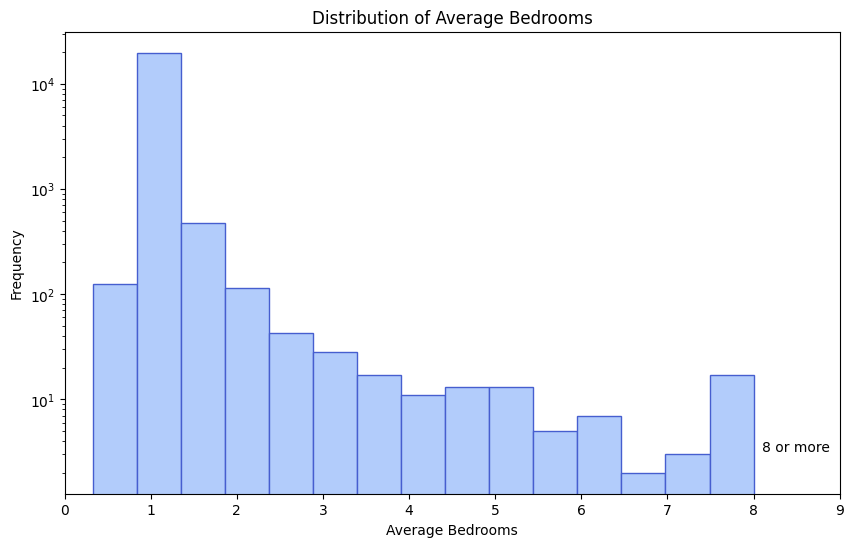

In [ ]:
# distribution of Average Bedrooms
clipped_data = np.clip(df['AveBedrms'], a_min=None, a_max=8)

plt.figure(figsize=(10, 6))
plt.hist(clipped_data, bins=15, color='#B2CCFB', edgecolor='#465ECF')
plt.title('Distribution of Average Bedrooms')
plt.xlabel('Average Bedrooms')
plt.ylabel('Frequency')
plt.xlim(0, 9) # set x-axis limits for better visualization of the distribution
plt.yscale('log') # set y-axis to a logarithmic scale
plt.text(8.1, 3, "8 or more", size=10, ha='left', va='bottom')
plt.show()

This histogram illustrates the frequency distribution of average bedrooms per household. It shows that the majority of block groups have a small average number of bedrooms, primarily concentrated around 1 to 2 bedrooms per house. The frequency decreases significantly as the average number of bedrooms increases.

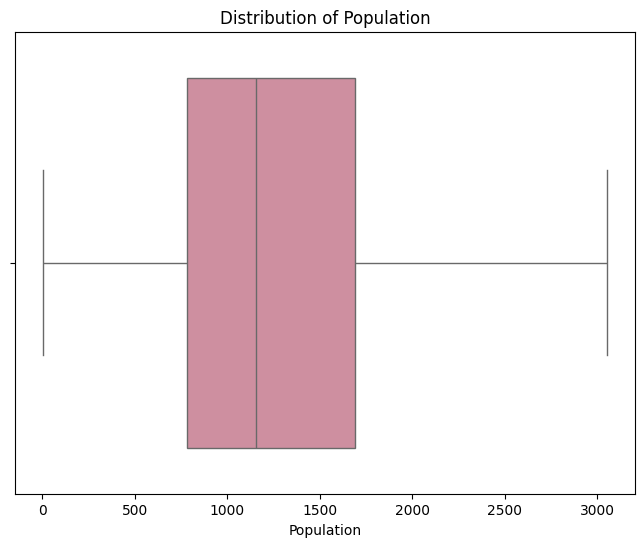

In [ ]:
# distribution of Population
col = 'Population'
# remove outliers above 5000 for better visualization
upper_threshold = 5000
# filter the dataframe to exclude values above the threshold
df_filtered = df[df[col] <= upper_threshold].copy()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered[col], color='#D9849B', showfliers=False) # hide individual outlier points
plt.title('Distribution of Population')
plt.show()

This box plot shows the distribution of block group populations, excluding values over 5000 for clarity. The Population column represents the total population of a block group (a small census area). The plot indicates the data is skewed right, with the median left of center and a longer right whisker. This means most block groups have lower populations, but some have moderately higher populations causing the skew.

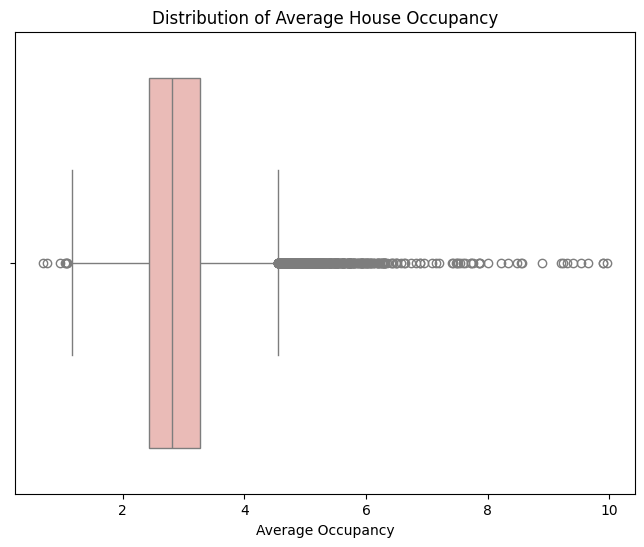

In [ ]:
# distribution of Average House Occupancy
col = 'AveOccup'
# remove outliers above 10 for better visualization
upper_threshold = 10
# filter the dataframe to exclude values above the threshold
df_filtered = df[df[col] <= upper_threshold].copy()

plt.figure(figsize=(8, 6))
aho = sns.boxplot(x=df_filtered[col], color='#F2B4AE')
plt.title('Distribution of Average House Occupancy')
aho.set_xlabel('Average Occupancy')
plt.show()

The box plot for the filtered Average House Occupancy shows a right-skewed distribution, with most households having a relatively low average number of occupants, and fewer households having a higher average occupancy, even after removing the most extreme outliers.

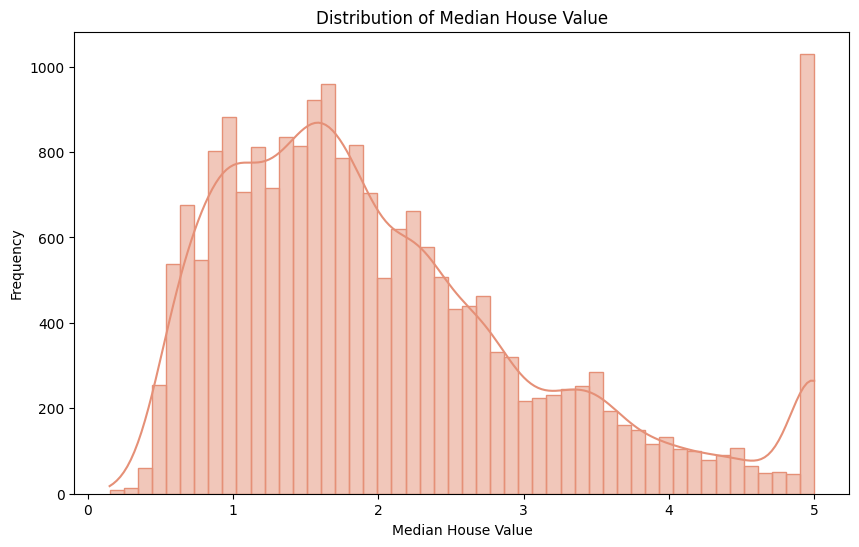

In [3]:
# distribution of Median House Value
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='#E59077', edgecolor='#E59077')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

This histogram reveals that median house values are largely concentrated in the lower to mid-range, showing a right skew where fewer block groups have extremely high values. The sharp peak at the maximum value strongly suggests that values exceeding this point were recorded at this limit.

## 3. Exploring Relationships Between Features (Bivariate Analysis)

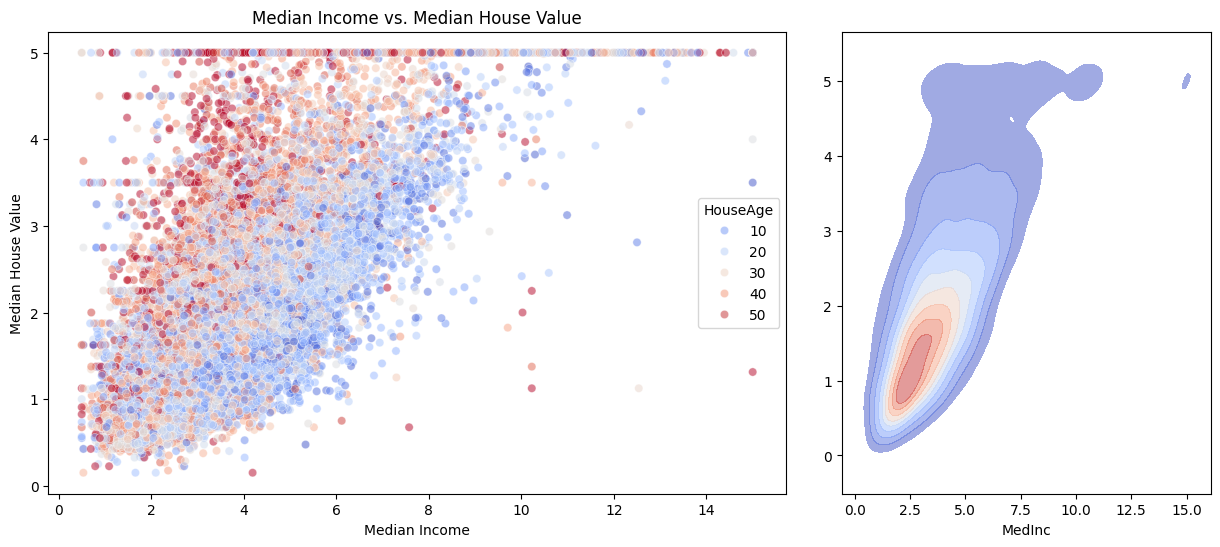

In [ ]:
# relationship between Median Income and Median House Value

fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

# scatter plot
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.5, hue='HouseAge', palette='coolwarm', ax=axes[0])
axes[0].set_title('Median Income vs. Median House Value')
axes[0].set_xlabel('Median Income')
axes[0].set_ylabel('Median House Value')

# KDE plot
sns.kdeplot(x='MedInc', y='MedHouseVal', data=df, cmap='coolwarm', fill=True, ax=axes[1], alpha=0.5)
axes[1].set_ylabel('')

plt.subplots_adjust(wspace=0.1) # adjust spacing between plots
plt.show()

There is a strong positive relationship between Median Income and Median House Value. The scatter plot shows the individual data points and the KDE plot provides a smoothed view of where the data is most concentrated. Both plots visually confirm that block groups with higher median incomes tend to have higher median house values.

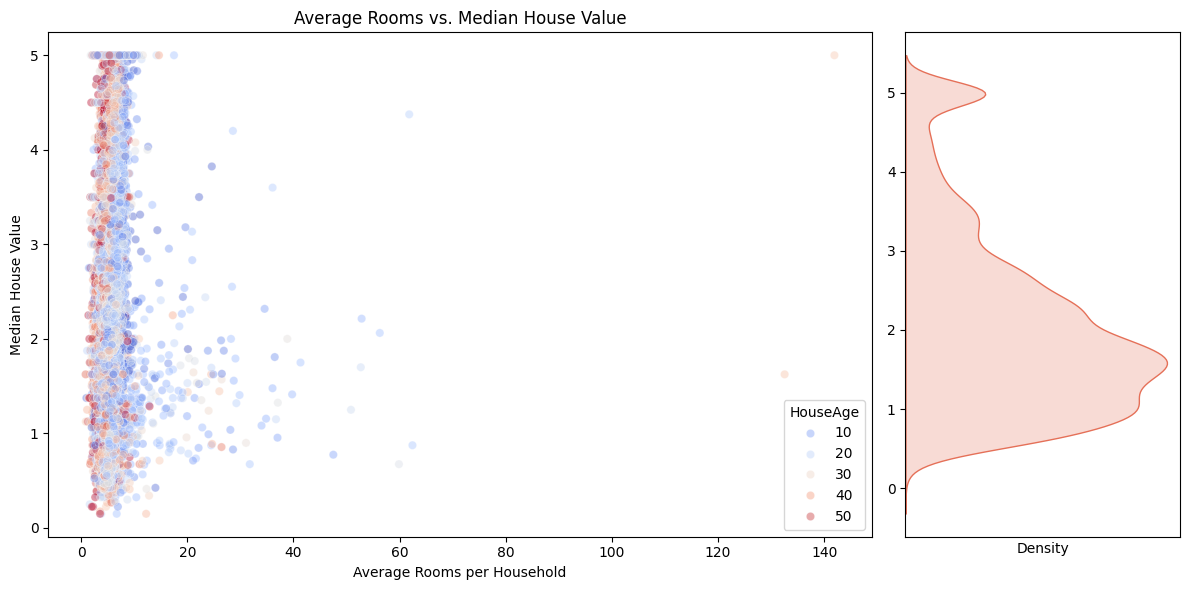

In [ ]:
# relationship between Median House Value and Average Rooms

fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

# scatter plot
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, alpha=0.4, hue='HouseAge', palette='coolwarm', ax=axes[0])
axes[0].set_title('Average Rooms vs. Median House Value')
axes[0].set_xlabel('Average Rooms per Household')
axes[0].set_ylabel('Median House Value')

# KDE plot
sns.kdeplot(y=df['MedHouseVal'], ax=axes[1], color='#E57058', fill=True, cbar=True, cbar_kws={'format': '%.2f'})
axes[1].set_ylabel('') # remove the y-axis label for clarity
axes[1].set_xticks([]) # remove x-axis ticks

plt.tight_layout()
plt.show()

The scatter plot indicates a positive but weaker relationship between Average Rooms and Median House Value compared to Median Income. The vertical KDE plot confirms that median house values are primarily concentrated in the lower to middle range. This suggests that while a higher number of rooms generally correlates with higher house values, other factors can influence the price.

## 4. Feature Engineering

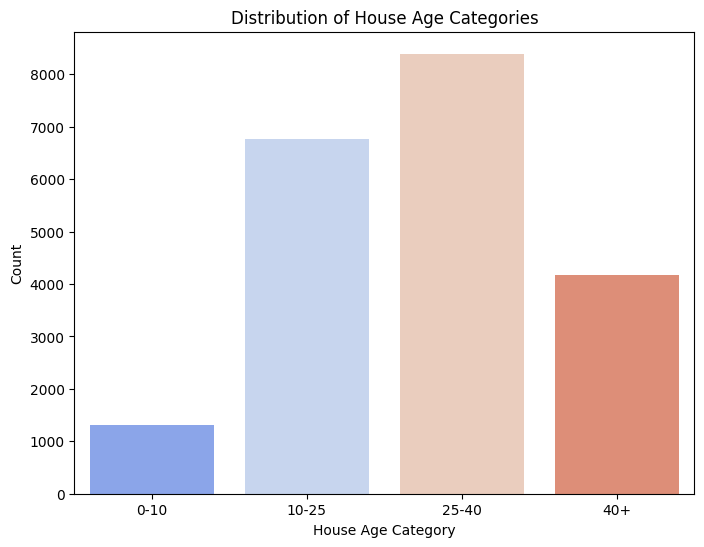

In [ ]:
# create HouseAge categories
# helps to understand if most houses are new, old or somewhere in between

# define bins and labels
age_bins = [0, 10, 25, 40, np.inf]
age_labels = ['0-10', '10-25', '25-40', '40+']
df['HouseAgeCategory'] = pd.cut(df['HouseAge'], bins=age_bins, labels=age_labels, right=False)

# visualize the distribution of the HouseAge feature
plt.figure(figsize=(8, 6))
sns.countplot(x='HouseAgeCategory', data=df, hue='HouseAgeCategory', palette='coolwarm', order=age_labels, legend=False)
plt.title('Distribution of House Age Categories')
plt.xlabel('House Age Category')
plt.ylabel('Count')
plt.show()

Categorizing `HouseAge` into `HouseAgeCategory` groups the data by age ranges. This process simplifies both the analysis and visualization of the data, potentially revealing valuable insights that are less obvious when working with the original numerical `HouseAge` values.

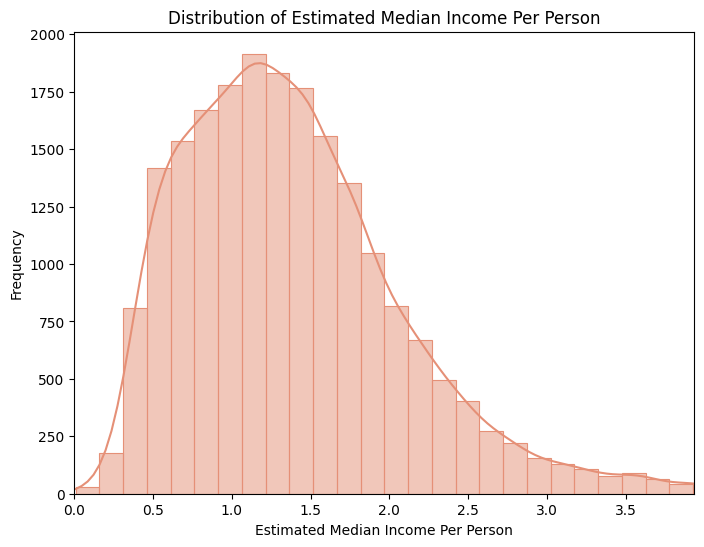

In [4]:
# create Estimated Median Income per Person
# it measures of the median income available per person

# handle cases where AveOccup is 0 or very close to 0 to avoid division errors
epsilon = 1e-6
df['MedIncPerPersonEstimate'] = df['MedInc'] / (df['AveOccup'] + epsilon)

# visualize the distribution of Estimated Median Income per Person
plt.figure(figsize=(8, 6))
sns.histplot(df['MedIncPerPersonEstimate'], bins=50, kde=True, color='#E59077', edgecolor='#E59077')
plt.title('Distribution of Estimated Median Income Per Person')
plt.xlabel('Estimated Median Income Per Person')
plt.ylabel('Frequency')

plt.xlim(0, df['MedIncPerPersonEstimate'].quantile(0.99)) # clip at 99th percentile for better visualization
plt.show()

The `MedIncPerPersonEstimate` feature provides a per-capita perspective on income within each block group, offering a potentially more granular and relevant measure of economic well-being that could be a stronger predictor of housing value than the aggregate median income alone.

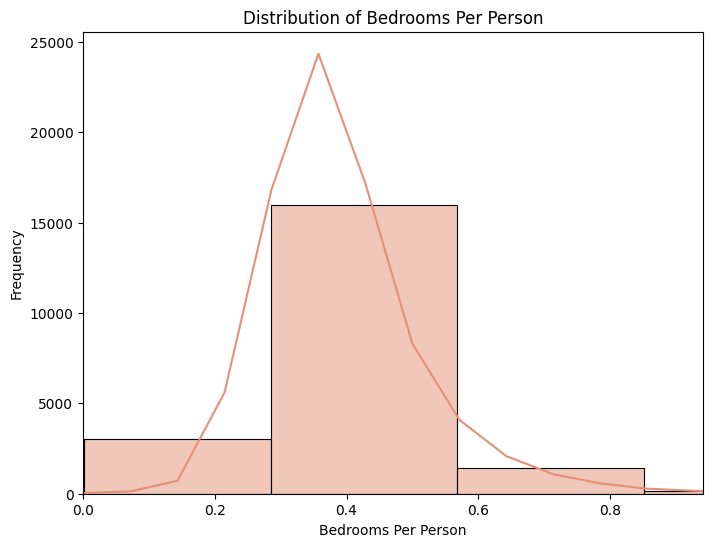

In [ ]:
# create the 'BedrmsPerPerson' feature
# estimates the number of bedrooms per person based on average household

# handle cases where AveOccup is 0 or very close to 0 to avoid division errors
epsilon = 1e-6
df['BedrmsPerPerson'] = df['AveBedrms'] / (df['AveOccup'] + epsilon)

# visualize the distribution of Bedrooms per Person
plt.figure(figsize=(8, 6))
sns.histplot(df['BedrmsPerPerson'], bins=50, kde=True, color='#E59077')
plt.title('Distribution of Bedrooms Per Person')
plt.xlabel('Bedrooms Per Person')
plt.ylabel('Frequency')

plt.xlim(0, df['BedrmsPerPerson'].quantile(0.99))
plt.show()

The `BedrmsPerPerson` feature is engineered by dividing the average number of bedrooms by the average household occupancy. This metric provides an estimate of the average number of bedrooms available per person within a block group. It can be interpreted as an indicator of potential living space or crowding, and exploring its relationship with `MedHouseVal` can reveal if the number of bedrooms per person is a significant factor influencing housing values.

## 5. Correlation Analysis:

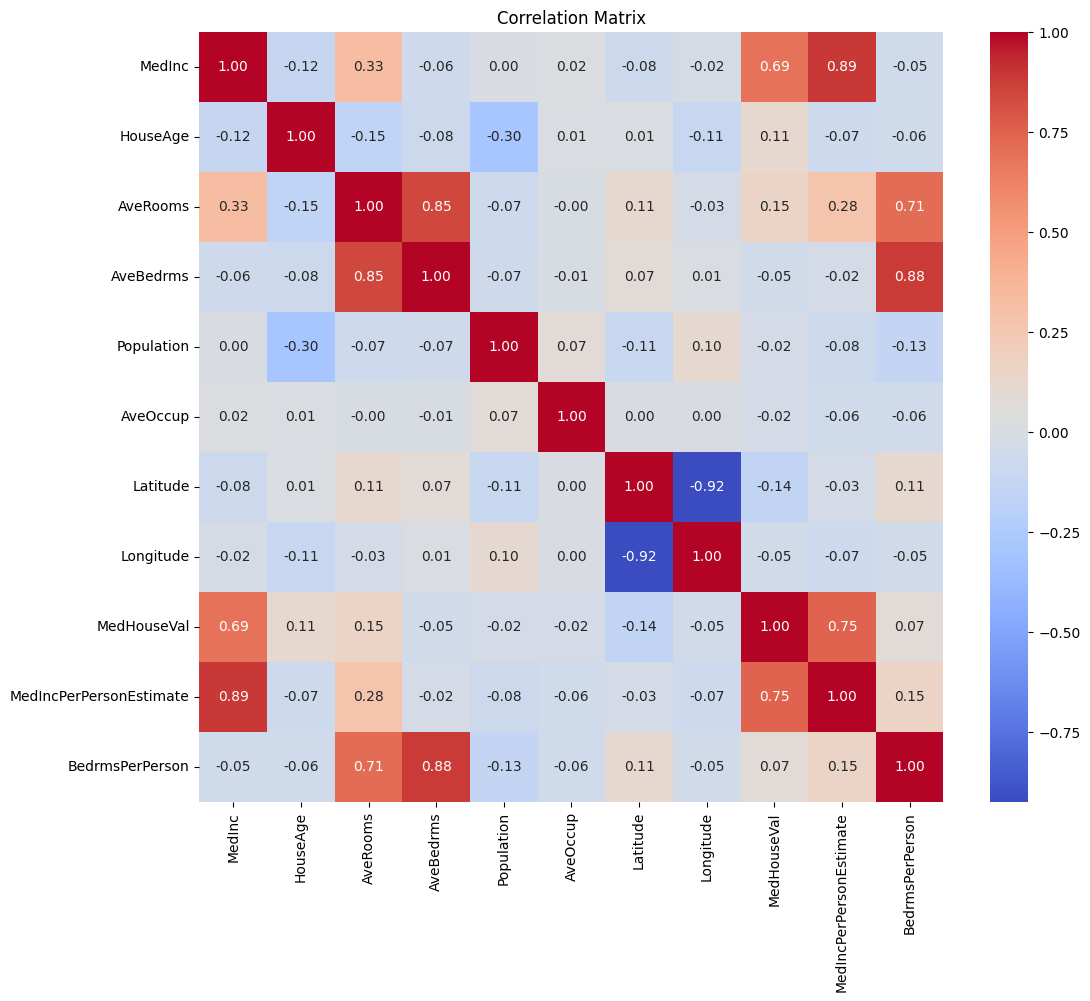

In [ ]:
# calculate correlation matrix

# exclude the non-numeric column
correlation_matrix = df.drop(columns=['HouseAgeCategory']).corr()

# create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation heatmap shows the linear relationships between features and Median House Value in the California Housing dataset. It strongly indicates that income and geographical location are the most important factors linearly associated with Median House Values. This means that areas with higher median incomes and certain geographical positions (represented by Latitude and Longitude) tend to have higher median house values.

Other features like Average Rooms and House Age show weaker linear relationships, suggesting that while they have some influence, they are not as strongly tied to  Median House Value as income and location. Population and Average Occupancy have very little linear correlation with Median House Value, implying that the total number of people in a block group or the average number of people per household doesn't have a significant linear impact on the median house value in this dataset.

The heatmap also highlights strong linear relationships among other features. The positive correlation between Average Rooms and Average Bedrooms is intuitive, as houses with more rooms are likely to also have more bedrooms. The negative correlation between Latitude and Longitude reflects the geographical layout of California, where higher latitudes generally correspond to more westerly longitudes.

## 6. Summary

This exploratory data analysis of the California Housing dataset began with loading and initial inspection, confirming data quality and identifying potential outliers through descriptive statistics. Univariate analysis using histograms and box plots revealed the distributions of individual features like Income, House Age, and room counts, highlighting skewness and outliers. Bivariate analysis explored relationships between features, most notably showing a strong positive correlation between Median Income and Median House Value. Feature engineering created new metrics like per-person income and house age categories for deeper insights. Finally, a Correlation Heatmap summarized linear relationships, reinforcing that Income and geographical location are the strongest linear predictors of Median House Value, while other features showed weaker associations.